<center><h1>Control Engineering Basics</h1></center>
<center><b>Dr.Varodom Toochinda</b></center>
<center>Dept. of Mechanical Engineering, Kasetsart University</center>

<a href="https://colab.research.google.com/github/dewdotninja/control_python/blob/master/ceb_m1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Module 1: Transfer Functions and Frequency Responses

<b>Requirement : </b> Python 3 with Scipy & Python control systems
<p />Uncomment and execute the commands below to install Python control systems library in Colab    


In [ ]:
#!pip install slycot

In [ ]:
#!pip install control

This article is contained in Control Engineering Basics study module, which is used as course material for Electrical-Mechanical Manufacturing Engineering (EMME), Department of Mechanical Engineering, Kasetsart University.

### Module Key Study Points
* How to create transfer functions using Scipy.signal or Python control systems library
* Frequency response concept
* Plotting frequency responses

In general, the first step for control system analysis and design is to acquire a model that represents the actual 
plant to be controlled. Then a feedback diagram is constructed with this plant model and a controller described as 
transfer functions, either in continuous or discrete time domain. For analysis and design in frequency domain such 
as the so-called classical method, loopshaping, or Quantitative Feedback Theory (QFT), some form of frequency 
response data is needed. Hence, in this module we show how to formulate a transfer function in Python and plot 
its frequency response.

### Transfer Function Formulation
<br>To be concrete, we consider in Figure 1 a simple diagram of robot joint driven by DC motor through a gear 
transmission with ratio r:1 [1].
<center><img src="https://drive.google.com/uc?id=1g-NGTzGm0qubXOy4D6mO58LXJ0KIG256" /></center>
<center>Figure 1 robot joint connected to DC motor via a gear transmission</center>
<br>Let J<sub>m</sub> = J<sub>a</sub> + J<sub>g</sub>  be the sum of motor and gear inertia. By simple calculation, 
it is easy to show that the rotational motion in terms of &theta;<sub>m</sub> is described by
\begin{equation} \tag{1}
J_m\frac{d^2\theta_m}{dt^2}+B_m\frac{d\theta_m}{dt} = \tau_m - \frac{\tau_l}{r}=k_ti_a - \frac{\tau_l}{r}   
\end{equation}
<p />where k<sub>t</sub> represents torque constant. We want to describe a model in transfer function form so that 
a block diagram can be drawn. To develop the electrical side of DC motor, consider the  model shown in Figure 2. 
<center><img src="https://drive.google.com/uc?id=1BEviD4Zrwc6vvqaHtuA5lTY9pXw9v-XV" /></center>
<center>Figure 2  a model of permanent magnet DC motor</center>
<p />By Kirschoff’s voltage law, we have

\begin{equation} \tag{2}
L_ai_a + R_ai_a = v_a - k_e\dot{\theta}_m   
\end{equation}

<p />where k<sub>e</sub>  is back emf constant. From now on we omit the a subscript in the armature inductance 
and resistance. It is left to the reader to verify that, in Laplace domain, the joint dynamics in Figure 1 
can be described by
\begin{equation} \tag{3} 
(Ls+R)I_a(s)=V(s)-k_es\theta_m(s)   
\end{equation}
\begin{equation} \tag{4}
(J_ms^2+B_ms)\theta_m(s)=k_tI_a(s) - \frac{\tau_l(s)}{r}
\end{equation}
<p />This can be drawn as a block diagram in Figure 3. 
<center><img src="https://drive.google.com/uc?id=1zspuIlLiYtp3e2POtr7Tb06FWFdcjHCB" /></center>
<center>Figure 3 block diagram of the robot joint dynamics in Figure 1</center>
<p />The transfer function from V(s)  to &theta;<sub>m</sub>  can be derived by setting &tau;<sub>l</sub> = 0 , 
which gives

\begin{equation} \tag{5}
\frac{\theta_m(s)}{V(s)} = \frac{k_t}{s[(Ls+R)(J_ms+B_m)+k_ek_t]}
\end{equation}

<p />Similarly, the transfer function from &tau;<sub>l</sub>  to &theta;<sub>m</sub>  is found by setting V=0. 

\begin{equation} \tag{6}
\frac{\theta_m(s)}{\tau_l(s)} = \frac{-(Ls+R)}{s[Ls+R)(J_ms+B_m)+k_ek_t]}
\end{equation}

<p />To simplify the equation further, we can assume that the electrical constant L/R  is much smaller than the 
mechanical constant J<sub>m</sub>/B<sub>m</sub>. So the transfer functions in (5) and (6) reduce to

\begin{equation} \tag{7}
\frac{\theta_m(s)}{V(s)} = \frac{k_t/R}{s(J_ms+B_m+k_ek_t/R)}
\end{equation}
\begin{equation} \tag{8}
\frac{\theta_m(s)}{\tau_l(s)} = \frac{-1/r}{s(J_ms+B_m+k_ek_t/R)}
\end{equation}

<p />respectively. These two equations correspond to second order differential equation in time domain  
\begin{equation} \tag{9}
J_m\ddot{\theta}_m(t) + (B_m + k_ek_t/R)\dot{\theta}_m(t) = (k_t/R)V(t) - \tau_l(t)/r
\end{equation}

<p />By omitting parameter subscripts, (9) can be rewritten as

\begin{equation} \tag{10}
J\ddot{\theta}(t) + B\dot{\theta}(t) = u(t) - d(t)
\end{equation}

<p />with B = B<sub>m</sub> + k<sub>e</sub>k<sub>t</sub>/R  represents effective damping, u = (K_t/R)V  control 
input, and d = &tau;<sub>l</sub>(t)/r  disturbance input. The reduced block diagram of (10) can be drawn as in 
Figure 4. 

<center><img src="https://drive.google.com/uc?id=16Qnve7yCFPCsd9Pcy7kbD0OWfcWfdnMT" /></center>
<center>Figure 4 reduced block diagram of robot joint dynamics</center>


<p />So, the transfer function for a robot joint driven by DC motor we will be using in our study modules is 
in the form

\begin{equation} \tag{11}
P(s) = \frac{1}{s(Js+B)}
\end{equation}

<p />Let’s put some values to the parameters, say, J = 10, B = 0.1. Hence the resulting transfer function becomes

\begin{equation} \tag{12}
P(s) = \frac{1}{10s^2 + 0.1s}
\end{equation}




<p />Now we demonstrate how to construct a transfer mfunction such as (12) in Python. First, let's use scipy.signal  

In [1]:
from scipy import signal

In [2]:
num = 1
den = [10, 0.1, 0]
P1 = signal.TransferFunction(num,den)
print('P(s)=', P1)

P(s)= TransferFunctionContinuous(
array([0.1]),
array([1.  , 0.01, 0.  ]),
dt: None
)


Note that scipy.signal scales the numerator and denominator of the transfer function. Also, the display output is 
somewhat hard to interpret.
<p />Now use Python control systems library

In [3]:
import control

In [4]:
num = 1
den = [10, 0.1, 0]
P2 = control.tf(num,den)
print('P(s)=', P2)

P(s)= 
      1
--------------
10 s^2 + 0.1 s



This output is quite clear to understand.

### Frequency responses
<p />Figure 5 depicts frequency response concept in a nutshell. In words, for a Linear Time-Invariant (LTI) system 
driven by a sinusoid input, the output is a sinusoid with same frequency, only its magnitude A and phase &phi;  
might change. When the input frequency varies, this results in new values for A and &phi;. This pair of data 
through out a range of frequency, actually a vector of complex numbers, constitutes a frequency response for an 
LTI system.  
<center><img src="https://drive.google.com/uc?id=1K9gUg22UlWiUrVQ885zWu0aWy1G9Wq-8" alt="Figure 5"/></center>
<img src="https://i.imgur.com/VFS1dCS.jpg" alt="Figure 5"/>

<center>Figure 5 An LTI system driven by sinusoid input</center>


### Relationship between transfer function and frequency response

<p />You may remember from linear systems course that, for a continuous-time transfer function described in terms 
of Laplace variable s, frequency response can be achieved by letting s = j&omega;. 

\begin{equation} \tag{13}
P(j\omega) = P(s)\vert_{s = j\omega}
\end{equation}

<p />By this relationship, a frequency response of a transfer function can be plotted "the hard way." Using (12) 
as an example, we solve for P(j&omega;) manually by substituting s = j&omega;, which gives

\begin{equation} \tag{14}
P(j\omega) = \frac{1}{-10\omega^2+0.1j\omega}
\end{equation}

<p />Then we can plot the magnitude and phase versus frequency by generating a vector of frequency and compute 
P(j&omega;) at each frequency points. This tedious approach is not recommended though, since we can yield frequcncy
response such as Bode plot using a simple set of commands in scipy.signal

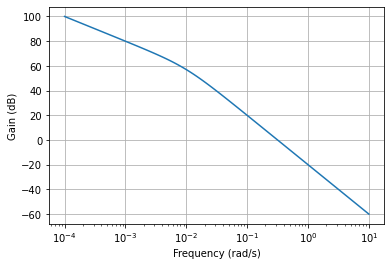

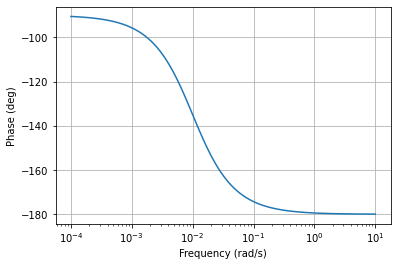

In [5]:
import matplotlib.pyplot as plt
w, mag, phase = signal.bode(P1)
plt.figure()
plt.semilogx(w, mag)    # Bode magnitude plot
plt.grid(True)
plt.xlabel("Frequency (rad/s)")
plt.ylabel("Gain (dB)")
plt.figure()
plt.semilogx(w, phase)  # Bode phase plot
plt.grid(True)
plt.xlabel("Frequency (rad/s)")
plt.ylabel("Phase (deg)")
plt.show()

or even simpler using Python control systems library.

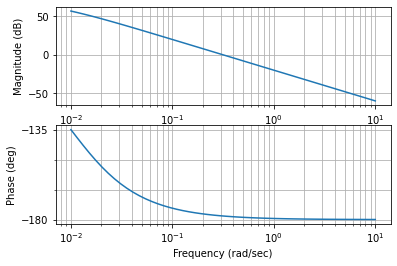

In [6]:
mag, ph, om = control.bode_plot(P2, dB=True,omega_limits=(0.01,10))